In [1]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
from numpy.linalg import slogdet
import matplotlib.pyplot as plt

#bempp.api.enable_console_logging()

Sphere-Sphere case 

In [2]:
h = .2   # size of the mesh (element)
center1 = (2, 0, 0) # center of one sphere

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
cube2 = bempp.api.shapes.cube(length=2, origin=(-3,-1,-1))

In [3]:
rwg1_sc = bempp.api.function_space(sphere1, "RWG", 0)
rwg2_sc = bempp.api.function_space(cube2, "RWG", 0)

snc1_sc = bempp.api.function_space(sphere1, "SNC", 0)
snc2_sc = bempp.api.function_space(cube2, "SNC", 0)

In [4]:
wavenumber = 1j*0.5

In [5]:
op11_sc = bempp.api.operators.boundary.maxwell.electric_field(rwg1_sc, rwg1_sc, snc1_sc, wavenumber)
op22_sc = bempp.api.operators.boundary.maxwell.electric_field(rwg2_sc, rwg2_sc, snc2_sc, wavenumber)
op21_sc = bempp.api.operators.boundary.maxwell.electric_field(rwg1_sc, rwg2_sc, snc2_sc, wavenumber)
op12_sc = bempp.api.operators.boundary.maxwell.electric_field(rwg2_sc, rwg1_sc, snc1_sc, wavenumber)

In [6]:
mat11_sc = np.real(bempp.api.as_matrix(op11_sc.weak_form()))
mat12_sc = np.real(bempp.api.as_matrix(op12_sc.weak_form()))
mat21_sc = np.real(bempp.api.as_matrix(op21_sc.weak_form()))
mat22_sc = np.real(bempp.api.as_matrix(op22_sc.weak_form()))

In [7]:
def plot_singular_values(mat):
    """Plot singular values of a matrix."""
    from scipy.linalg import svdvals
    s = svdvals(mat)
    plt.semilogy(s)
    plt.xlabel('k')
    plt.ylabel('sigma_k')

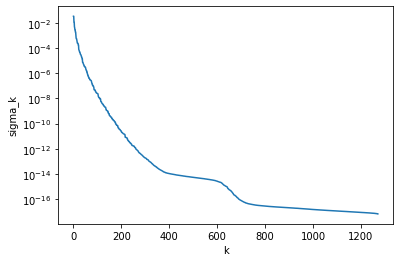

In [8]:
plot_singular_values(np.linalg.inv(mat11_sc)@mat12_sc)